In [1]:
import tensorflow as tf

2023-11-22 16:11:25.012435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 16:11:25.012461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 16:11:25.013441: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 16:11:25.106039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 16:11:26.116684: W tensorflow/compiler/

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-11-22 16:11:27.270100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 16:11:27.432912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 16:11:27.433191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
import os
path = "../snack_data/snack_unfilled/"
os.listdir(path)

['snack.unfilled.2114.jpg',
 'snack.unfilled.248.jpg',
 'snack.unfilled.8384.jpg',
 'snack.unfilled.528.jpg',
 'snack.unfilled.3609.jpg',
 'snack.unfilled.2452.jpg',
 'snack.unfilled.6018.jpg',
 'snack.unfilled.3462.jpg',
 'snack.unfilled.2344.jpg',
 'snack.filled.246.jpg',
 'snack.unfilled.2051.jpg',
 'snack.unfilled.419.jpg',
 'snack.unfilled.2962.jpg',
 'snack.unfilled.4658.jpg',
 'snack.filled.1807.jpg',
 'snack.unfilled.1857.jpg',
 'snack.filled.2449.jpg',
 'snack.unfilled.8754.jpg',
 'snack.unfilled.450.jpg',
 'snack.unfilled.3156.jpg',
 'snack.unfilled.185.jpg',
 'snack.filled.1951.jpg',
 'snack.filled.2246.jpg',
 'snack.unfilled.2990.jpg',
 'snack.filled.1326.jpg',
 'snack.unfilled.7073.jpg',
 'snack.unfilled.7363.jpg',
 'snack.unfilled.7636.jpg',
 'snack.unfilled.9002.jpg',
 'snack.filled.1235.jpg',
 'snack.unfilled.1367.jpg',
 'snack.unfilled.2019.jpg',
 'snack.unfilled.8523.jpg',
 'snack.unfilled.4293.jpg',
 'snack.unfilled.5798.jpg',
 'snack.unfilled.4185.jpg',
 'snack.unfi

In [5]:
snack_names = os.listdir(path)
snack_labels = [each.split('.')[1] for each in snack_names]
snack_id =[each.split('.')[2] for each in snack_names]

In [6]:
len(snack_names)

11837

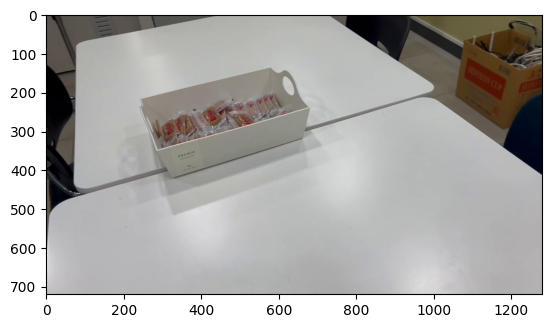

In [7]:
# import random
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

sample = random.choice(snack_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [8]:
sample = random.choice(snack_names)
image = mpimg.imread(path+ sample)
image.shape

(720, 1280, 3)

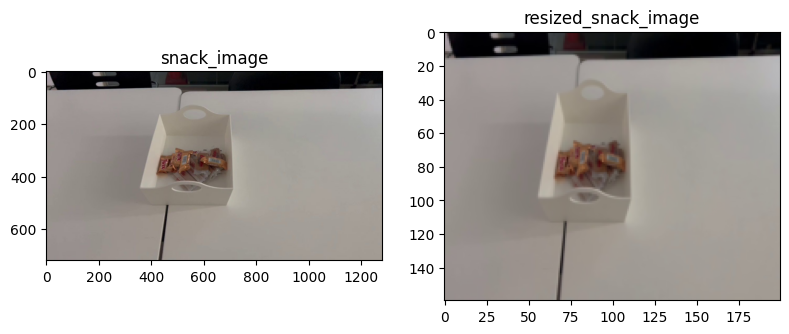

In [12]:
from skimage.transform import resize
resized = resize(image, (160, 200, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("snack_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_snack_image")

fig.tight_layout()
plt.show()

In [13]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(snack_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (160, 200, 3)))

images = np.array(images)

  0%|          | 0/11837 [00:00<?, ?it/s]

: 